In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_train.csv')
df.head()

# All the rows containing blank spaces are removed and the new train data are uploaded

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


# Preprocessing and Normalising Data

In [3]:
X = df[['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 
        'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']] .values
X[0:5]

array([['Male', 'Yes', '1', 'Graduate', 'No', 4583, 1508, 128, 360, 1,
        'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 3000, 0, 66, 360, 1,
        'Urban'],
       ['Male', 'Yes', '0', 'Not Graduate', 'No', 2583, 2358, 120, 360,
        1, 'Urban'],
       ['Male', 'No', '0', 'Graduate', 'No', 6000, 0, 141, 360, 1,
        'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'Yes', 5417, 4196, 267, 360, 1,
        'Urban']], dtype=object)

In [4]:
y = df['Loan_Status'].values
y[0:5]

array(['N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [5]:
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male','Female'])
X[:,0] = le_gender.transform(X[:,0]) 


le_married = preprocessing.LabelEncoder()
le_married.fit([ 'Yes', 'No'])
X[:,1] = le_married.transform(X[:,1])

le_dependents = preprocessing.LabelEncoder()
le_dependents.fit([ '0', '2','1','3+'])
X[:,2] = le_dependents.transform(X[:,2])

le_education = preprocessing.LabelEncoder()
le_education.fit([ 'Graduate', 'Not Graduate'])
X[:,3] = le_education.transform(X[:,3])


le_self_employed = preprocessing.LabelEncoder()
le_self_employed.fit([ 'Yes', 'No'])
X[:,4] = le_self_employed.transform(X[:,4])


le_property_area = preprocessing.LabelEncoder()
le_property_area.fit([ 'Semiurban', 'Urban','Rural'])
X[:,10] = le_property_area.transform(X[:,10]) 

X[0:5]

array([[1, 1, 1, 0, 0, 4583, 1508, 128, 360, 1, 0],
       [1, 1, 0, 0, 1, 3000, 0, 66, 360, 1, 2],
       [1, 1, 0, 1, 0, 2583, 2358, 120, 360, 1, 2],
       [1, 0, 0, 0, 0, 6000, 0, 141, 360, 1, 2],
       [1, 1, 2, 0, 1, 5417, 4196, 267, 360, 1, 2]], dtype=object)

In [6]:
df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

In [7]:
df = df[pd.to_numeric(df['Loan_Status'], errors='coerce').notnull()]
df['Loan_Status'] = df['Loan_Status'].astype('int64')
df.dtypes

df = df[pd.to_numeric(df['Gender'], errors='coerce').notnull()]
df['Gender'] = df['Gender'].astype('int64')
df.dtypes

df = df[pd.to_numeric(df['Married'], errors='coerce').notnull()]
df['Married'] = df['Married'].astype('int64')
df.dtypes

df = df[pd.to_numeric(df['Dependents'], errors='coerce').notnull()]
df['Dependents'] = df['Dependents'].astype('int64')
df.dtypes

df = df[pd.to_numeric(df['Education'], errors='coerce').notnull()]
df['Education'] = df['Education'].astype('int64')
df.dtypes

df = df[pd.to_numeric(df['Self_Employed'], errors='coerce').notnull()]
df['Self_Employed'] = df['Self_Employed'].astype('int64')
df.dtypes

df = df[pd.to_numeric(df['Property_Area'], errors='coerce').notnull()]
df['Property_Area'] = df['Property_Area'].astype('int64')
df.dtypes

df = df[pd.to_numeric(df['Loan_ID'], errors='coerce').notnull()]
df['Loan_ID'] = df['Loan_ID'].astype('int64')
df.dtypes

Loan_ID              int64
Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int64
Loan_Status          int64
dtype: object

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.46719815,  0.73716237,  0.21859918, -0.50325312, -0.3992747 ,
        -0.13796959, -0.0279521 , -0.20808917,  0.27554157,  0.41319694,
        -1.31886834],
       [ 0.46719815,  0.73716237, -0.76203265, -0.50325312,  2.50454133,
        -0.4175358 , -0.60463305, -0.97900085,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815,  0.73716237, -0.76203265,  1.98707162, -0.3992747 ,
        -0.49118022,  0.29710015, -0.30756164,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815, -1.35655324, -0.76203265, -0.50325312, -0.3992747 ,
         0.11228014, -0.60463305, -0.04644639,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815,  0.73716237,  1.19923101, -0.50325312,  2.50454133,
         0.00931924,  0.99997786,  1.52024509,  0.27554157,  0.41319694,
         1.25977445]])

# Splitting data for training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 11) (384,)
Test set: (96, 11) (96,)


# 

# <center> 1. KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63541667, 0.58333333, 0.69791667, 0.70833333, 0.73958333,
       0.71875   , 0.76041667, 0.75      , 0.76041667])

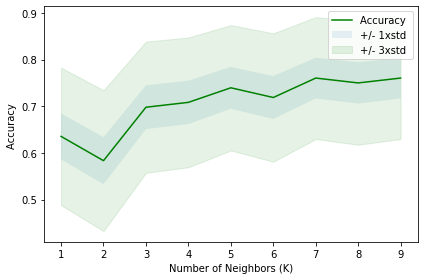

In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [13]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7604166666666666 with k= 7


In [14]:
k = 7 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [15]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [16]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8307291666666666
Test set Accuracy:  0.7604166666666666


# 

# <center> 2. Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [18]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['Y' 'Y' 'Y' 'Y' 'Y']
['N' 'Y' 'Y' 'Y' 'Y']


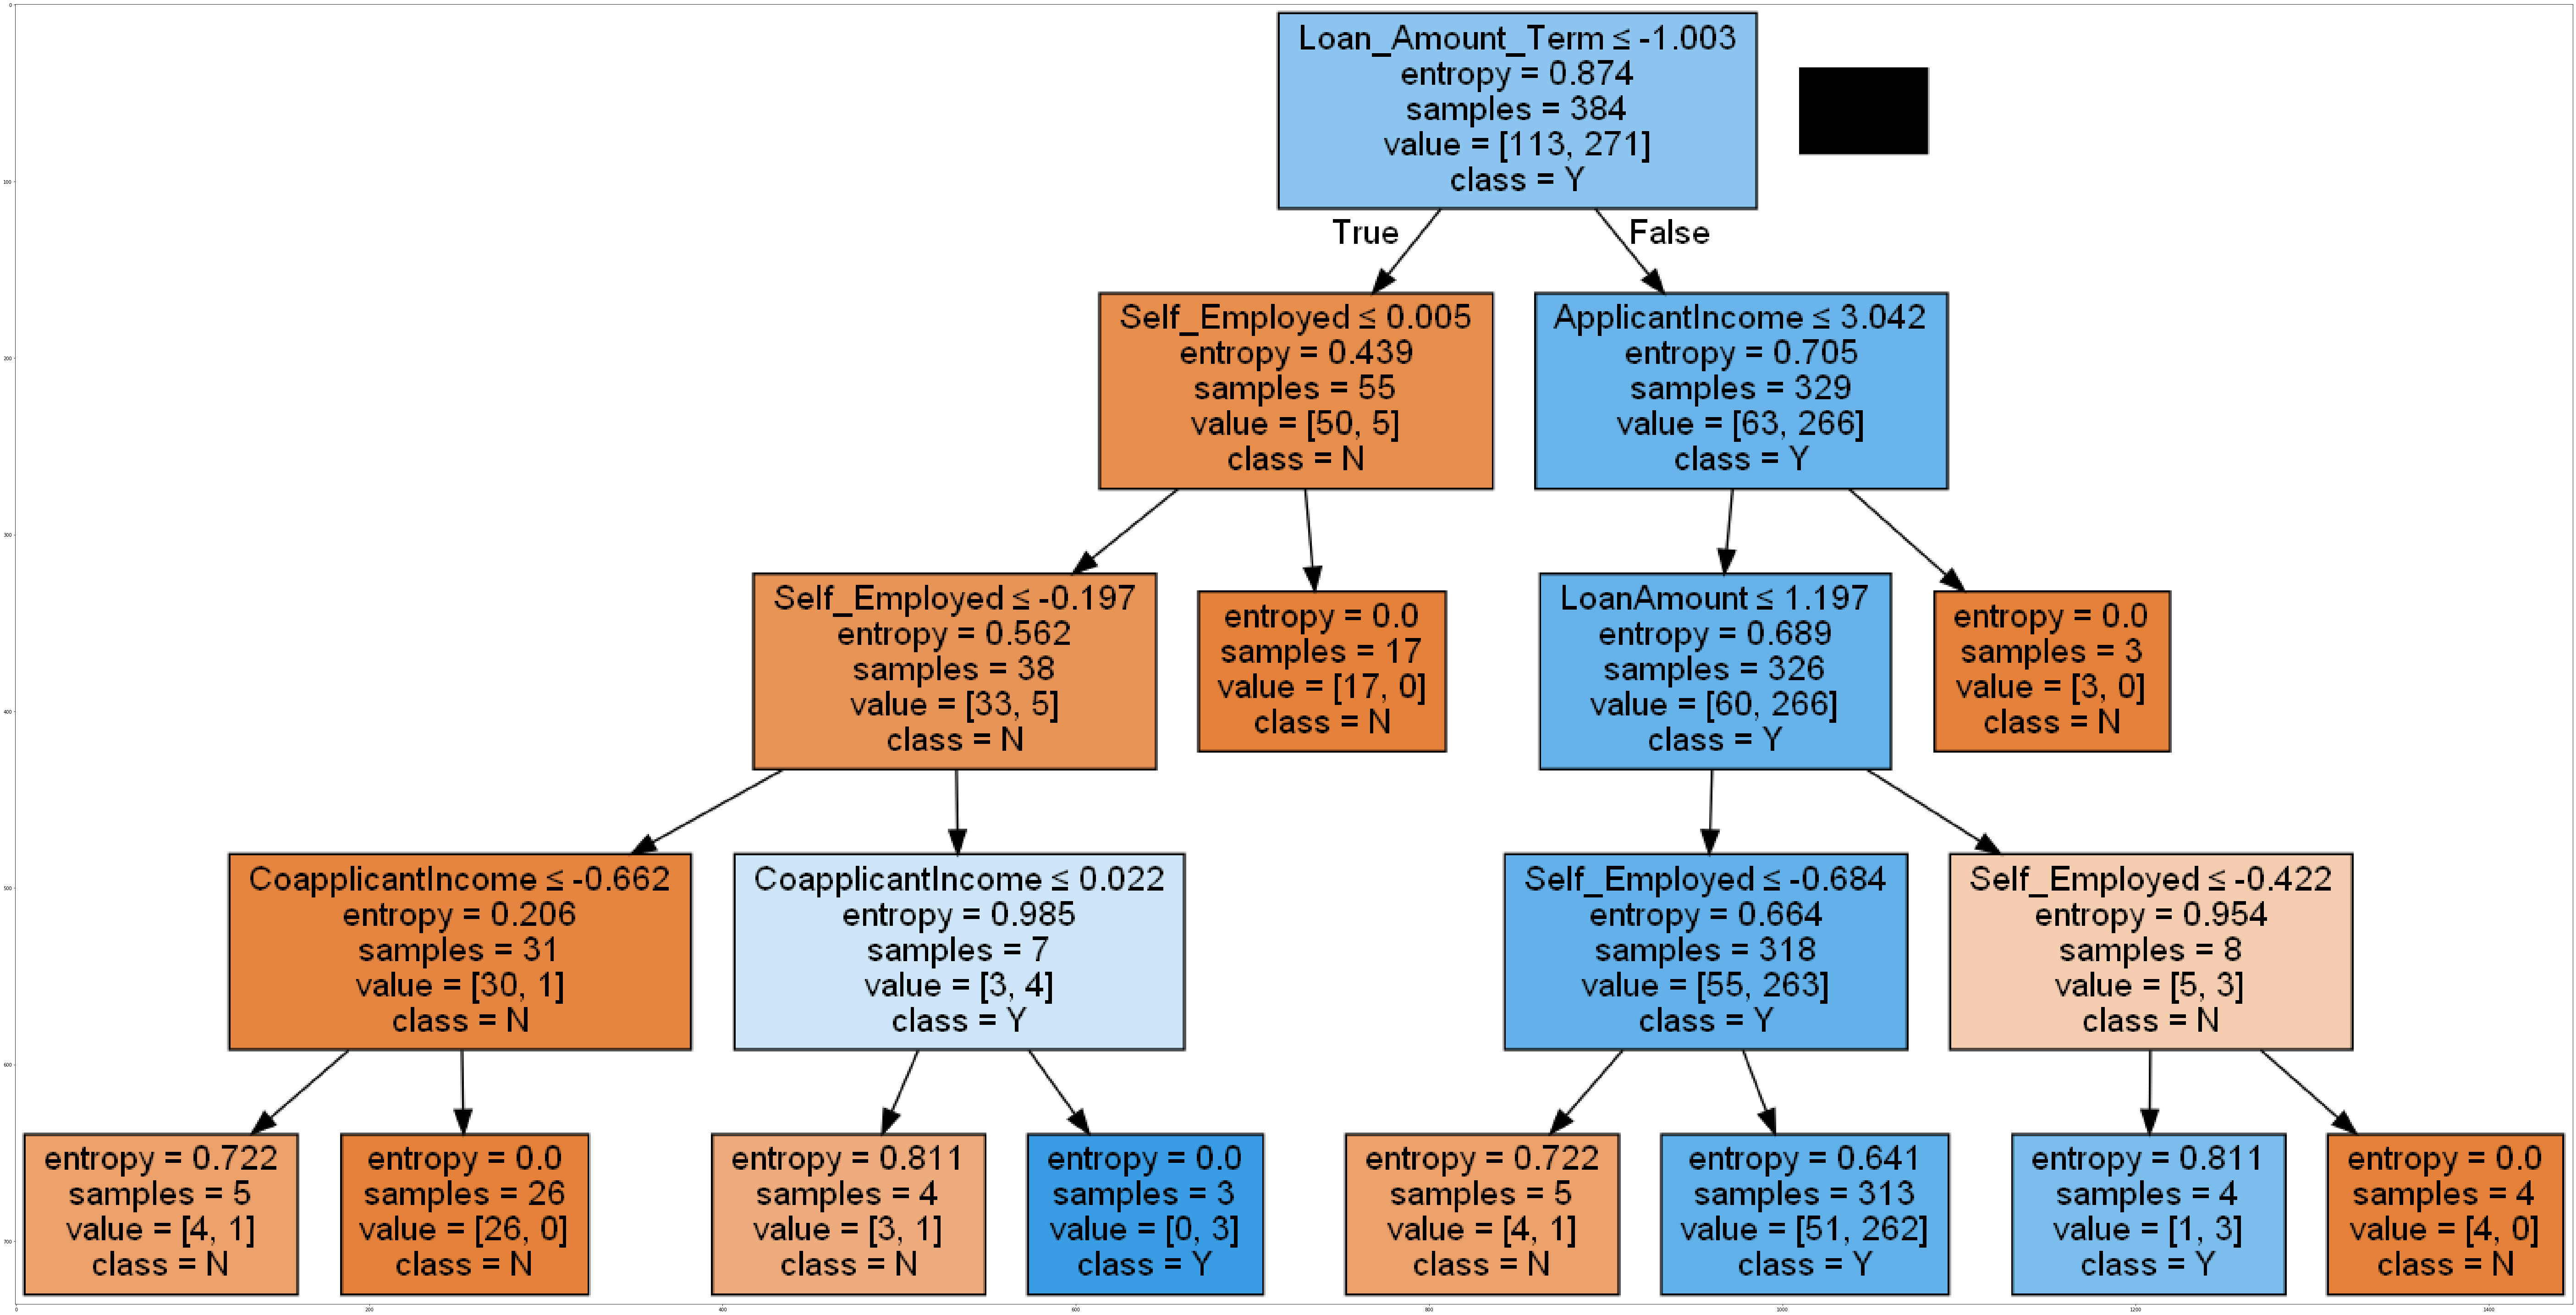

In [19]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = df.columns[0:11]
out=tree.export_graphviz(loanTree,feature_names=featureNames, 
                         out_file=dot_data, class_names= np.unique(y_train), 
                         filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [20]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7291666666666666


# 

# <center> 3. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
import itertools

In [22]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [23]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['Y','N']))

[[59  2]
 [22 13]]


Confusion matrix, without normalization
[[59  2]
 [22 13]]


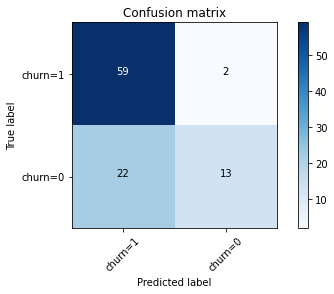

In [25]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Y','N'])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  
                      title='Confusion matrix')

In [26]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           N       0.87      0.37      0.52        35
           Y       0.73      0.97      0.83        61

    accuracy                           0.75        96
   macro avg       0.80      0.67      0.68        96
weighted avg       0.78      0.75      0.72        96



In [27]:
jaccard_score(y_test, yhat,pos_label='Y')

0.7108433734939759

In [28]:
log_loss(y_test, yhat_prob)

0.5747334547668722

# 

# <center> 4. SVM

In [29]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [30]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [31]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           N       0.82      0.40      0.54        35
           Y       0.73      0.95      0.83        61

    accuracy                           0.75        96
   macro avg       0.78      0.68      0.68        96
weighted avg       0.77      0.75      0.72        96

Confusion matrix, without normalization
[[58  3]
 [21 14]]


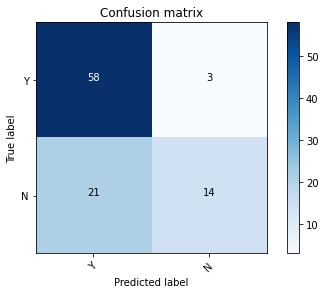

In [33]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Y','N'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Y','N'],normalize= False,  title='Confusion matrix')

In [34]:
jaccard_score(y_test, yhat,pos_label='Y')

0.7073170731707317

In [35]:
f1_score(y_test, yhat, average='weighted') 

0.7228021978021978